In [140]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [ ]:
# import data set
data_dir = Path('../datathon')

# read data set
df = pd.read_csv(data_dir / 'labourforce_monthly.csv', parse_dates=['date'])
df.head()

# remove the empty columns
df = df.dropna(axis=1, how='all')

# Remove all the unnecessary columns only left the date and unemployed columns
df = df[['date', 'unemployed']]

# check data type of the variable

# plot the data set
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(df.date, df.unemployed, label='train')

# add title and legend to the plot
plt.title('Unemployed Rate from 2010 to 2023 in Malaysia')

print(df.head())

In [ ]:
df.index = df.date

#remove date
df = df.drop(['date'], axis=1)
df

# 3. Test for Data Set
## 3.1 Stationary Test

In [ ]:
# perform the stationarity test
unemployed_mean = df.unemployed.rolling(3).mean()
unemployed_std = df.unemployed.rolling(3).std()
plt.plot(df.unemployed, color = "black", label='Unemployment rate')
plt.plot( unemployed_mean, color = "red", label='Unemployment rate mean')
plt.plot(unemployed_std, color = "green", label='Unemployement rate std')
plt.title('Unemployed Rate from 2010 to 2023 in Malaysia')
plt.legend(loc = "best")

In [ ]:
# perform the stationarity test
adft = adfuller(df.unemployed, autolag='AIC')
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

## 3.2 Autocorrelation

In [ ]:
autocorrelation_lag1 = df.unemployed.autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = df.unemployed.autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df.unemployed.autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df.unemployed.autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df.dropna(), ax=ax[1], lags=20)

## 3.3 Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='additive')
trend = result.trend
seasonal = result.seasonal
residual = result.resid

plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(411)
plt.plot(df)
plt.title('Original Time Series')

# Trend component
plt.subplot(412)
plt.plot(trend)
plt.title('Trend Component')

# Seasonal component
plt.subplot(413)
plt.plot(seasonal)
plt.title('Seasonal Component')

# Residual component
plt.subplot(414)
plt.plot(residual)
plt.title('Residual Component')

plt.tight_layout()
plt.show()


# 4. Data Transformation

         Values                       Metric
0 -1.210448e+01              Test Statistics
1  1.983487e-22                      p-value
2  0.000000e+00             No. of lags used
3  1.610000e+02  Number of observations used
4 -3.471633e+00          critical value (1%)
5 -2.879665e+00          critical value (5%)
6 -2.576434e+00         critical value (10%)


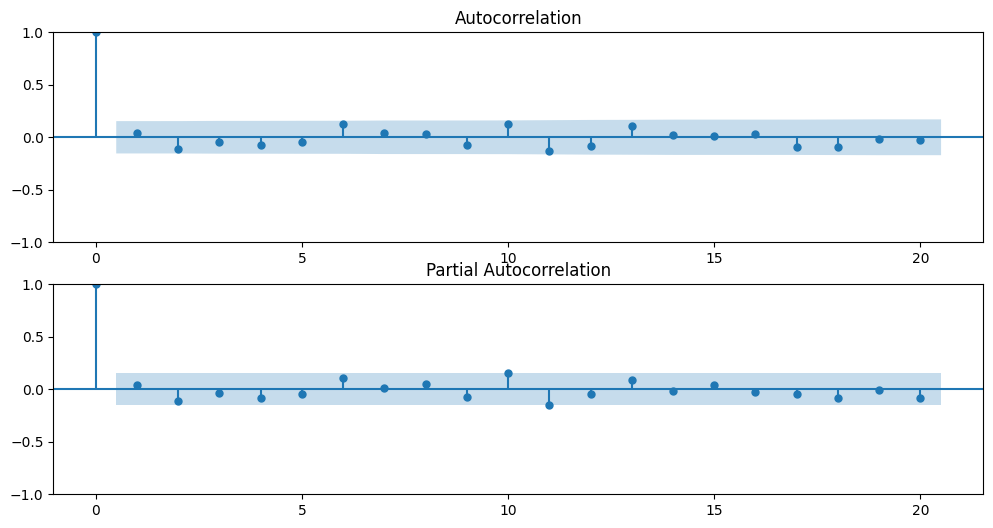

In [125]:
df_diff = df.diff().dropna()


# perform the stationarity test
adft = adfuller(df_diff.unemployed, autolag='AIC')
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

# autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df_diff.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df_diff.dropna(), ax=ax[1], lags=20)

# 5. Fitting the Model

In [128]:
# split the data set into train and test
train_diff = df_diff[df_diff.index < '2019-01-01']
test_diff = df_diff[df_diff.index >= '2019-01-01']
train.shape, test.shape

((107, 1), (55, 1))

In [156]:
# Fit the Exponential Smoothing model (additive or multiplicative)
# model = ExponentialSmoothing(train_diff)  # For additive smoothing with seasonality
model = ExponentialSmoothing(train_diff)  # For multiplicative smoothing with seasonality
model_fit = model.fit()
forecasts = model_fit.forecast(steps=52)


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [151]:
 len(train)- len(test_diff)

52

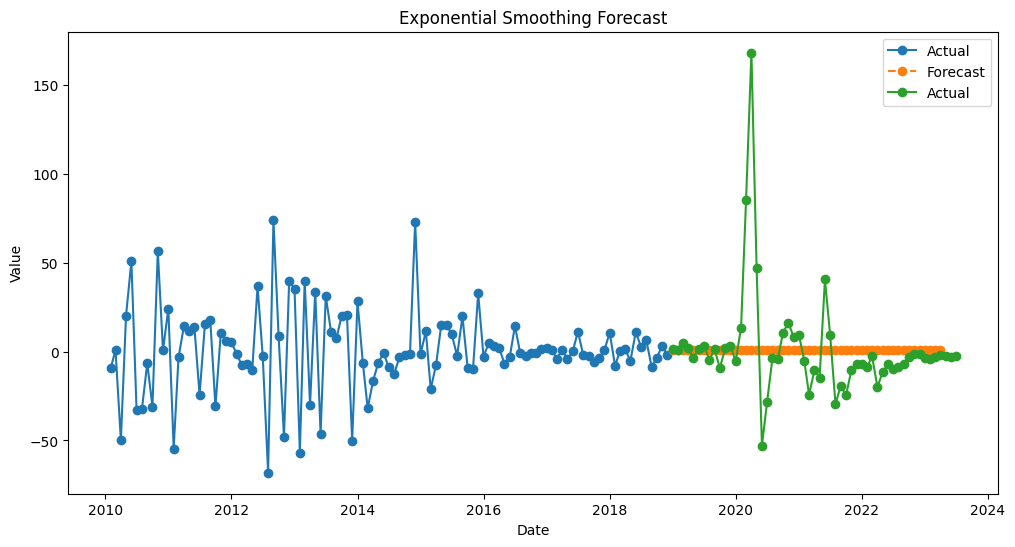

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(train_diff, label='Actual', linestyle='-', marker='o')
plt.plot(forecasts, label='Forecast', linestyle='--', marker='o')
plt.plot(test_diff, label='Actual', linestyle='-', marker='o') 
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()



# 4. ARIMA test

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=969.865, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=985.186, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=974.193, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=965.369, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=983.285, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=966.728, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=966.507, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=968.101, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=964.045, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=965.549, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=965.352, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=972.410, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=966.896, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.648 seconds


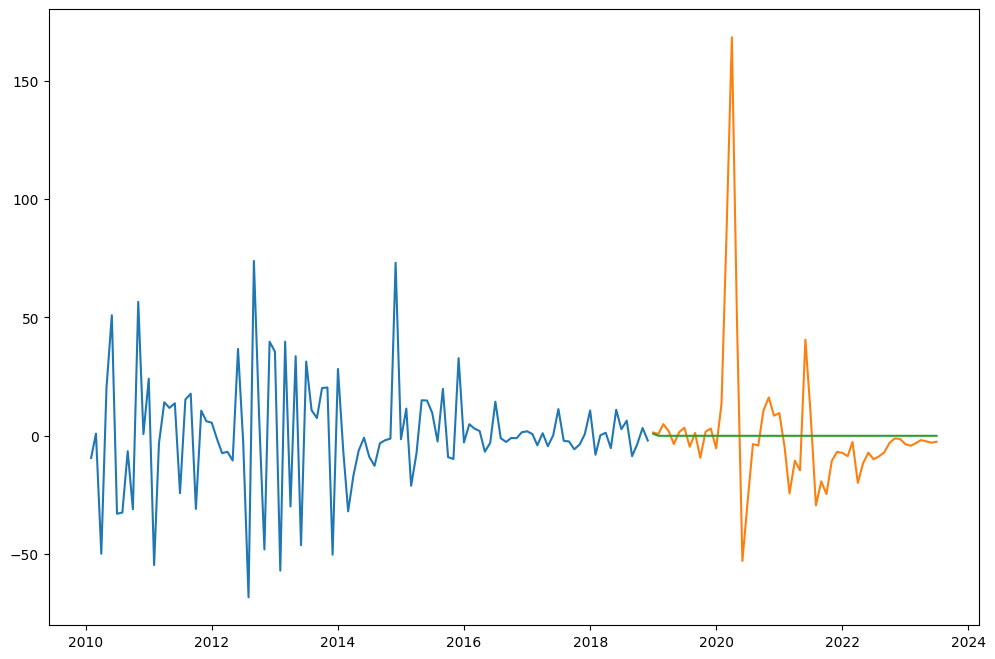

In [159]:
model = auto_arima(train_diff, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_diff)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
# plot the predictions for validation set
plt.figure(figsize=(12,8))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Valid')
plt.plot(forecast, label='Prediction')

In [ ]:
rms = sqrt(mean_squared_error(test.unemployed,forecast))
print("RMSE: ", rms)